# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    print(f"lat_lng: {lat_lng}")
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    print(city)
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

lat_lng: (-11.464730475199751, 161.80954081257167)
kirakira
lat_lng: (71.36135201599403, 74.67522222949177)
pangody
lat_lng: (55.977994138148695, 125.51479876240118)
chul'man
lat_lng: (6.544060929791778, -54.62600244055219)
nieuw amsterdam
lat_lng: (74.85737264106014, 85.59232538983342)
dudinka
lat_lng: (35.93038981769861, -70.51709460836828)
kill devil hills
lat_lng: (65.09503088469016, -94.93613784055114)
thompson
lat_lng: (-86.05139125508873, 19.70512424772734)
bredasdorp
lat_lng: (-14.513773563754667, 170.12437660721673)
saratamata
lat_lng: (57.674314325553304, -106.43948186702443)
la ronge
lat_lng: (31.698035991513038, 118.73777820745669)
gushu
lat_lng: (0.25692838537047846, 108.25426631262287)
sungai raya
lat_lng: (-30.49350334244513, -159.5077857839072)
avarua
lat_lng: (-5.756253013022052, -124.8556856048248)
taiohae
lat_lng: (-44.106517964895296, -71.5768364146852)
trevelin
lat_lng: (-78.59666952318692, -81.7869519185517)
ushuaia
lat_lng: (2.677764695599034, 154.4555477879713)


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?" 

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = "metric"

    # Build query URL and request your results in Celsius
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Get weather data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] 
        city_lng = city_weather["coord"]["lon"]
        city_name = city
       
        # Get temperature from JSON response
        
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        city_ID = city_weather["id"]
       
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,
                          "City ID": city_ID})
       
      

     #If an error is experienced, skip the city
    except KeyError as e:
        
        print("City not found. Skipping...")
        
        pass
              
#Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kirakira
Processing Record 2 of Set 1 | pangody
Processing Record 3 of Set 1 | chul'man
Processing Record 4 of Set 1 | nieuw amsterdam
Processing Record 5 of Set 1 | dudinka
Processing Record 6 of Set 1 | kill devil hills
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | saratamata
City not found. Skipping...
Processing Record 10 of Set 1 | la ronge
Processing Record 11 of Set 1 | gushu
Processing Record 12 of Set 1 | sungai raya
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | trevelin
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | weno
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | fort bragg
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | camiri
Processing Record 22 of

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
City ID       565
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City ID
0,kirakira,-10.4544,161.9205,27.12,84,100,1.88,SB,1712100175,2178753
1,pangody,65.8500,74.4859,0.15,98,100,8.69,RU,1712100175,1495626
2,chul'man,56.8479,124.9104,-6.37,92,99,4.85,RU,1712100176,2025261
3,nieuw amsterdam,5.8833,-55.0833,29.01,70,20,1.03,SR,1712100176,3383434
4,dudinka,69.4058,86.1778,-10.18,94,100,6.71,RU,1712100041,1507116


In [15]:
# Convert datetime to readable date format
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City ID
0,kirakira,-10.4544,161.9205,27.12,84,100,1.88,SB,2024-04-02,2178753
1,pangody,65.8500,74.4859,0.15,98,100,8.69,RU,2024-04-02,1495626
2,chul'man,56.8479,124.9104,-6.37,92,99,4.85,RU,2024-04-02,2025261
3,nieuw amsterdam,5.8833,-55.0833,29.01,70,20,1.03,SR,2024-04-02,3383434
4,dudinka,69.4058,86.1778,-10.18,94,100,6.71,RU,2024-04-02,1507116


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City ID.1
City ID,,,,,,,,,,
0,kirakira,-10.4544,161.9205,27.12,84,100,1.88,SB,2024-04-02,2178753
1,pangody,65.8500,74.4859,0.15,98,100,8.69,RU,2024-04-02,1495626
2,chul'man,56.8479,124.9104,-6.37,92,99,4.85,RU,2024-04-02,2025261
3,nieuw amsterdam,5.8833,-55.0833,29.01,70,20,1.03,SR,2024-04-02,3383434
4,dudinka,69.4058,86.1778,-10.18,94,100,6.71,RU,2024-04-02,1507116


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

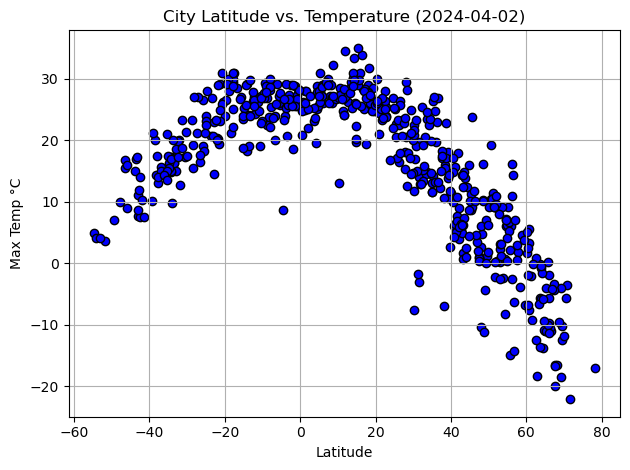

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='blue', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

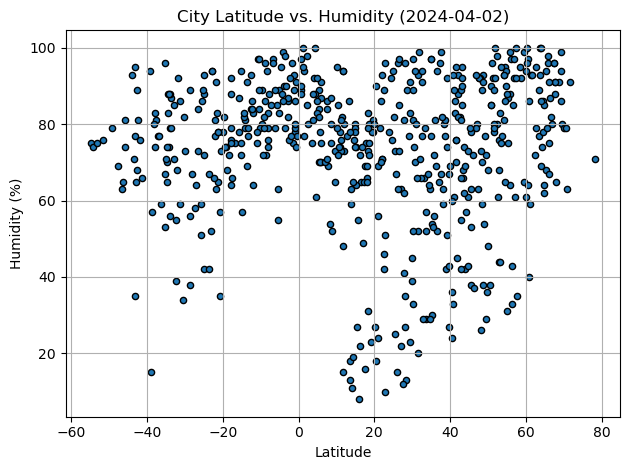

In [19]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='blue', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

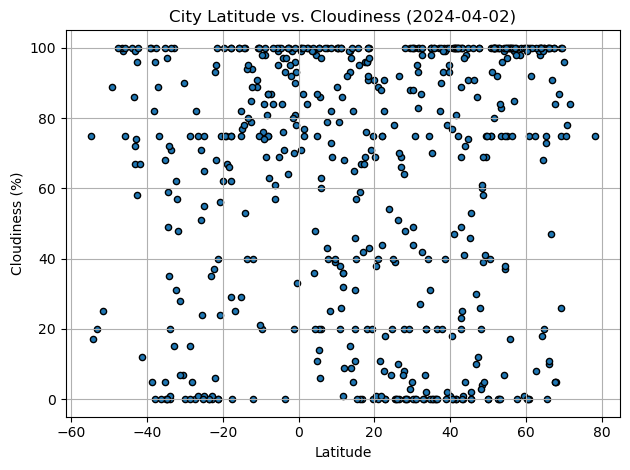

In [20]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='blue', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

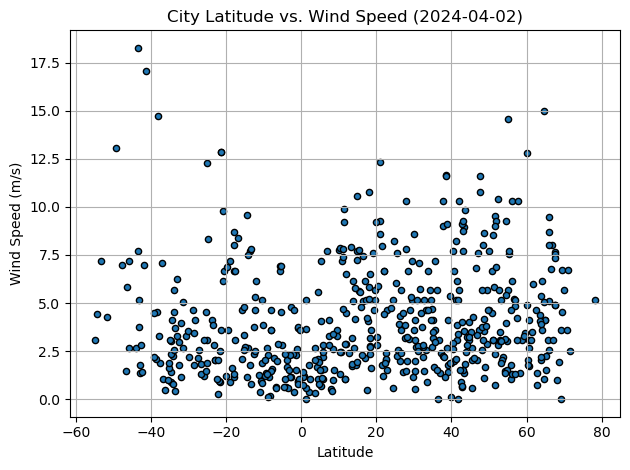

In [21]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
#Create a function to create perform linear regression on the weather data  and  
# plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y-values" from the slope and the intercept.
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line.
    line_eq = "y= " + str(round(slope,2)) + "x + " +str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color= "red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is {r_value:.3f}")

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
north_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City ID.1
City ID,,,,,,,,,,
1,pangody,65.8500,74.4859,0.15,98,100,8.69,RU,2024-04-02,1495626
2,chul'man,56.8479,124.9104,-6.37,92,99,4.85,RU,2024-04-02,2025261
3,nieuw amsterdam,5.8833,-55.0833,29.01,70,20,1.03,SR,2024-04-02,3383434
4,dudinka,69.4058,86.1778,-10.18,94,100,6.71,RU,2024-04-02,1507116
5,kill devil hills,36.0307,-75.6760,19.61,81,0,5.66,US,2024-04-02,4474274


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hem_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
south_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City ID.1
City ID,,,,,,,,,,
0,kirakira,-10.4544,161.9205,27.12,84,100,1.88,SB,2024-04-02,2178753
7,bredasdorp,-34.5322,20.0403,15.99,88,49,1.43,ZA,2024-04-02,1015776
11,avarua,-21.2078,-159.7750,29.03,65,40,3.60,CK,2024-04-02,4035715
12,trevelin,-43.0858,-71.4639,7.71,95,67,3.76,AR,2024-04-02,3833675
13,ushuaia,-54.8000,-68.3000,4.81,75,75,3.09,AR,2024-04-02,3833367


###  Temperature vs. Latitude Linear Regression Plot

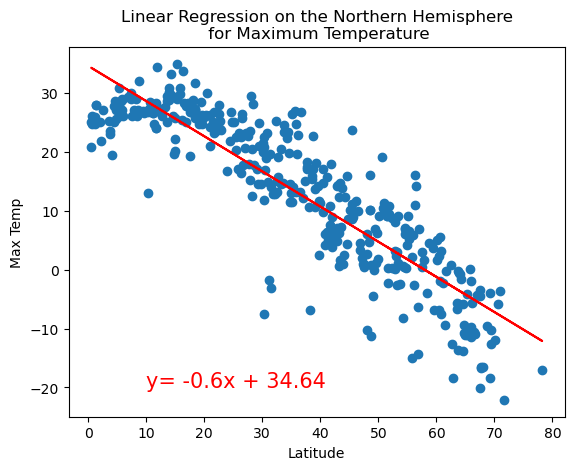

The r-value is -0.888


In [26]:
# Linear regression on Northern Hemisphere

# Graph Properties
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Max Temp"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for Maximum Temperature", "Max Temp",(10,-20))



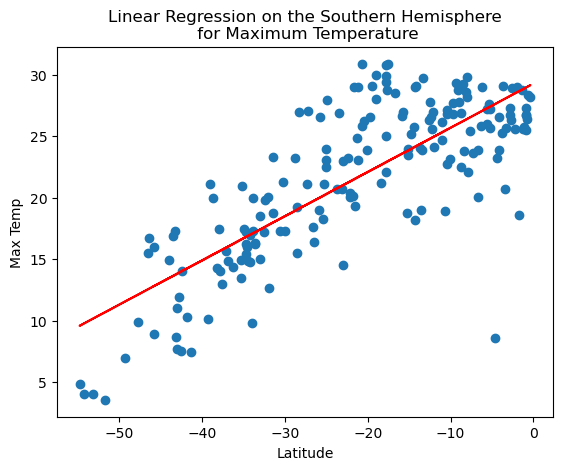

The r-value is 0.787


In [27]:
# Linear regression on Southern Hemisphere


# Graph Properties
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Max Temp"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for Maximum Temperature", "Max Temp", (-50,90))



### Humidity vs. Latitude Linear Regression Plot

**Discussion about the linear relationship:** YOUR RESPONSE HERE

At the northen hemisphere,a negative correlation is observed between latitude and temperature, indicating that as latitude increases, temperature decreases. This trend suggests that locations closer to the poles (higher latitudes) tend to have lower temperatures, while regions near the equator (lower latitudes) have warmer temperatures. This pattern is consistent with the Earth's climate zones, where colder climates are typically found at higher latitudes and warmer climates are found at lower latitudes."

At the southernhemisphere, 
As you move closer to the equator (lower latitudes), the temperature increases, indicating a warmer climate.
Conversely, as you move towards the poles (higher latitudes), the temperature decreases, indicating a colder climate.
The temperature increases by 5 degrees for every 10-degree decrease in latitude, indicating a strong positive correlation between the two variables.
This relationship suggests that the climate becomes warmer as you move towards the equator and colder as you move towards the poles, which is consistent with geographical patterns.


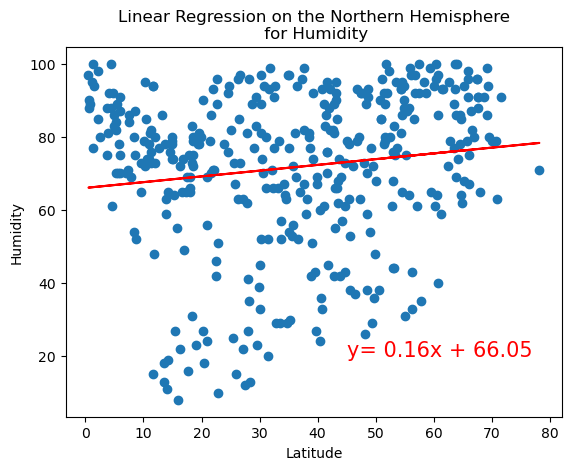

The r-value is 0.142


In [28]:
# Northern Hemisphere
#linear regression on the northern hemisphere.
# Graph Properties
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Humidity"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for Humidity", "Humidity", (45,20))


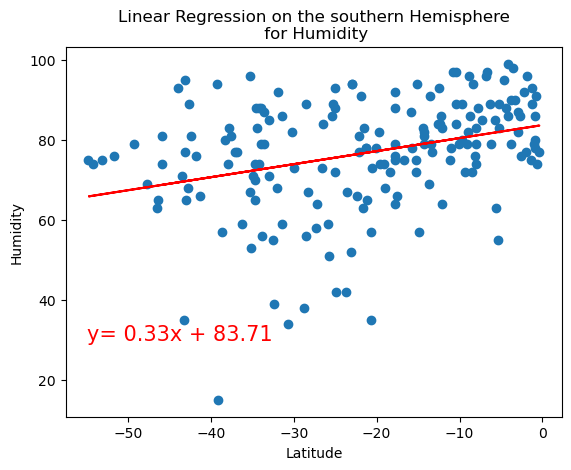

The r-value is 0.326


In [29]:
# Southern Hemisphere
# YOUR CODE HERE
#linear regression on the northern hemisphere.
# Graph Properties
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Humidity"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the southern Hemisphere\n for Humidity", "Humidity", (-55,30))





## **Discussion about the linear relationship:** YOUR RESPONSE HERE


This equation suggests that there is a positive relationship between latitude and humidity in the Northern Hemisphere and Southern Hemisphere. Specifically, for every degree increase in latitude, the humidity is expected to increase .


### Cloudiness vs. Latitude Linear Regression Plot

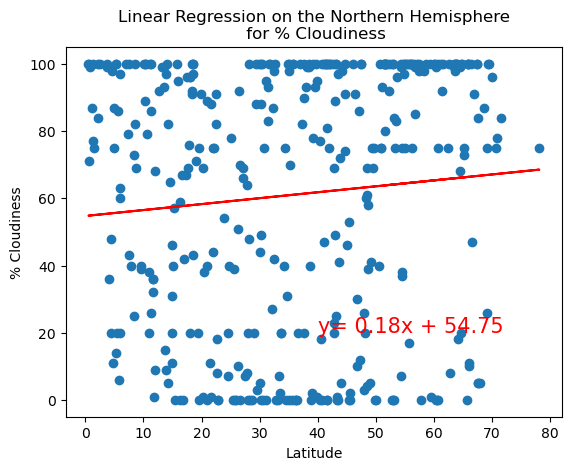

The r-value is 0.089


In [30]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Cloudiness"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for % Cloudiness", "% Cloudiness", (40,20))



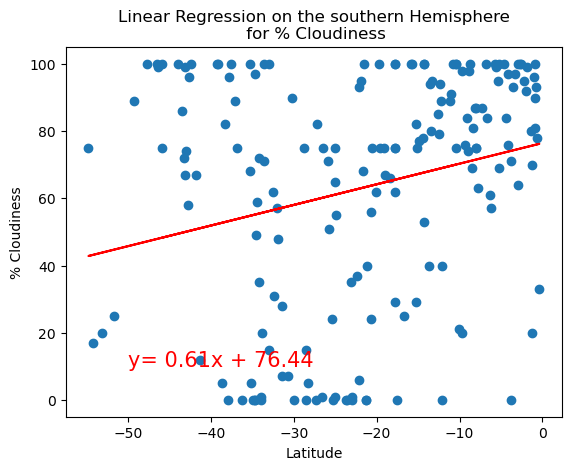

The r-value is 0.247


In [31]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Cloudiness"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the southern Hemisphere\n for % Cloudiness", "% Cloudiness", (-50,10))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

a relatively weak relationship between cloudiness and latitude in the North Hemisphere, explaining only about 21.9% of the variability in cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

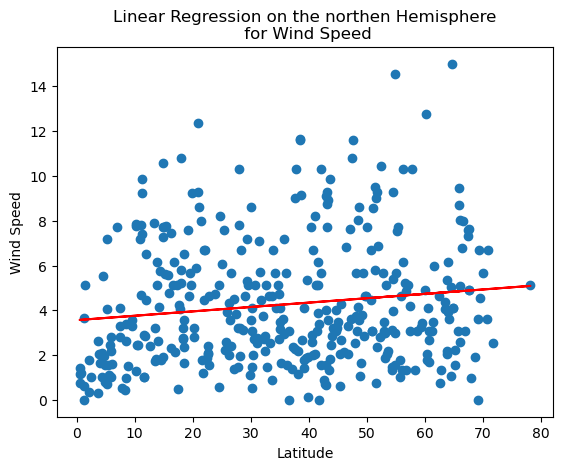

The r-value is 0.137


In [32]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Wind Speed"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the northen Hemisphere\n for Wind Speed", "Wind Speed", (10,50))

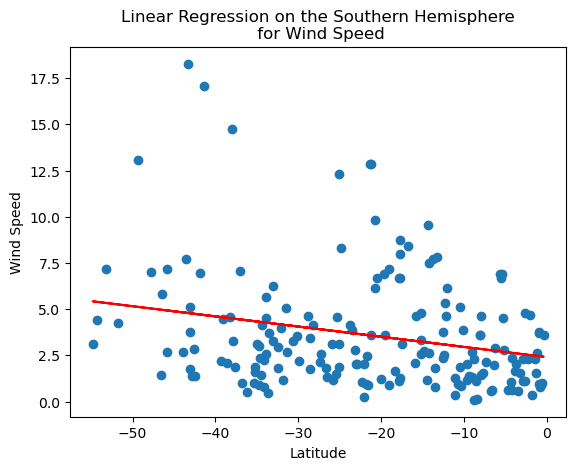

The r-value is -0.251


In [33]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Wind Speed"]



#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for Wind Speed", "Wind Speed", (-50,20))

**Discussion about the linear relationship:** 

 Based on R-Squared value, Latitude has little no impact on Wind Speed in the Northern Hemisphere.
 it seems to be decreased in the Southern Hemisphere though.